In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
import seaborn as sns

In [2]:
df = pd.read_excel("Homestays_Data1.xlsx")
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

In [4]:
df.describe(include ="all")

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
count,7.411100e+04,74111.000000,74111,74111,74111,74111.000000,73911.000000,74111,74111,74111,...,74111.000000,74111.000000,74101,67239,74111.000000,57389.000000,65895,73145.0,74020.000000,73980.000000
unique,NaN,NaN,35,3,67122,NaN,NaN,5,5,2,...,NaN,NaN,73349,619,NaN,NaN,65883,669.0,NaN,NaN
top,NaN,NaN,Apartment,Entire home/apt,{},NaN,NaN,Real Bed,strict,True,...,NaN,NaN,Bunk bed in the Treat Street Clubhouse,Williamsburg,NaN,NaN,https://a0.muscache.com/im/pictures/70087089/b...,11211.0,NaN,NaN
freq,NaN,NaN,49003,41310,586,NaN,NaN,72028,32374,54403,...,NaN,NaN,8,2862,NaN,NaN,3,1618.0,NaN,NaN
mean,1.126662e+07,4.782069,NaN,NaN,NaN,3.155146,1.235263,NaN,NaN,NaN,...,38.445958,-92.397525,NaN,NaN,20.900568,94.067365,NaN,NaN,1.265793,1.710868
min,3.440000e+02,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,...,33.338905,-122.511500,NaN,NaN,0.000000,20.000000,NaN,NaN,0.000000,0.000000
25%,6.261964e+06,4.317488,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,34.127908,-118.342374,NaN,NaN,1.000000,92.000000,NaN,NaN,1.000000,1.000000
50%,1.225415e+07,4.709530,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,40.662138,-76.996965,NaN,NaN,6.000000,96.000000,NaN,NaN,1.000000,1.000000
75%,1.640226e+07,5.220356,NaN,NaN,NaN,4.000000,1.000000,NaN,NaN,NaN,...,40.746096,-73.954660,NaN,NaN,23.000000,100.000000,NaN,NaN,1.000000,2.000000
max,2.123090e+07,7.600402,NaN,NaN,NaN,16.000000,8.000000,NaN,NaN,NaN,...,42.390437,-70.985047,NaN,NaN,605.000000,100.000000,NaN,NaN,10.000000,18.000000


**TASK 1 - FEATURE ENGINEERING**

**Using date time module we create a new column host tenure**

In [5]:
df['host_since'].head()

0   2012-03-26
1   2017-06-19
2   2016-10-25
3   2015-04-19
4   2015-03-01
Name: host_since, dtype: datetime64[ns]

In [6]:
current_date = datetime.now()
current_date

datetime.datetime(2024, 5, 7, 22, 4, 12, 875860)

In [7]:
df['host_tenure'] = (current_date - df['host_since']).dt.days // 365
df['host_tenure'].head()

0    12.0
1     6.0
2     7.0
3     9.0
4     9.0
Name: host_tenure, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      74111 non-null  int64         
 1   log_price               74111 non-null  float64       
 2   property_type           74111 non-null  object        
 3   room_type               74111 non-null  object        
 4   amenities               74111 non-null  object        
 5   accommodates            74111 non-null  int64         
 6   bathrooms               73911 non-null  float64       
 7   bed_type                74111 non-null  object        
 8   cancellation_policy     74111 non-null  object        
 9   cleaning_fee            74111 non-null  bool          
 10  city                    74111 non-null  object        
 11  description             74105 non-null  object        
 12  first_review            58247 non-null  dateti

In [9]:
df['amenities'].head()

0    {"Wireless Internet","Air conditioning",Kitche...
1    {"Wireless Internet","Air conditioning",Kitche...
2    {TV,"Cable TV","Wireless Internet","Air condit...
3    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4    {TV,Internet,"Wireless Internet","Air conditio...
Name: amenities, dtype: object

In [10]:
def remove_quotes(cell):
    return cell.replace('"', '').replace("'", '')

In [11]:
df['amenities'] = df['amenities'].apply(remove_quotes)
df['amenities'].head()

0    {Wireless Internet,Air conditioning,Kitchen,He...
1    {Wireless Internet,Air conditioning,Kitchen,He...
2    {TV,Cable TV,Wireless Internet,Air conditionin...
3    {TV,Cable TV,Internet,Wireless Internet,Kitche...
4    {TV,Internet,Wireless Internet,Air conditionin...
Name: amenities, dtype: object

In [12]:
def count_items(cell):
    items = re.findall(r'\b\w+\b', cell)
    return len(items)

In [13]:
df['amenities_count'] = df['amenities'].apply(count_items)
df['amenities_count'].head()

0    17
1    25
2    36
3    26
4    20
Name: amenities_count, dtype: int64

In [14]:
df['Days_Since_Last_Review'] = (current_date - df['last_review']).dt.days
df['Days_Since_Last_Review'].head()

0    2850.0
1    2418.0
2    2427.0
3       NaN
4    2662.0
Name: Days_Since_Last_Review, dtype: float64

In [15]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,host_tenure,amenities_count,Days_Since_Last_Review
0,6901257,5.010635,Apartment,Entire home/apt,"{Wireless Internet,Air conditioning,Kitchen,He...",3,1.0,Real Bed,strict,True,...,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,12.0,17,2850.0
1,6304928,5.129899,Apartment,Entire home/apt,"{Wireless Internet,Air conditioning,Kitchen,He...",7,1.0,Real Bed,strict,True,...,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,6.0,25,2418.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,Cable TV,Wireless Internet,Air conditionin...",5,1.0,Real Bed,moderate,True,...,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,7.0,36,2427.0
3,13418779,6.620073,House,Entire home/apt,"{TV,Cable TV,Internet,Wireless Internet,Kitche...",4,1.0,Real Bed,flexible,True,...,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,9.0,26,NaN
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,Wireless Internet,Air conditionin...",2,1.0,Real Bed,moderate,True,...,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,9.0,20,2662.0


**TASK2 - EDA**

**Histogram of numerical features**

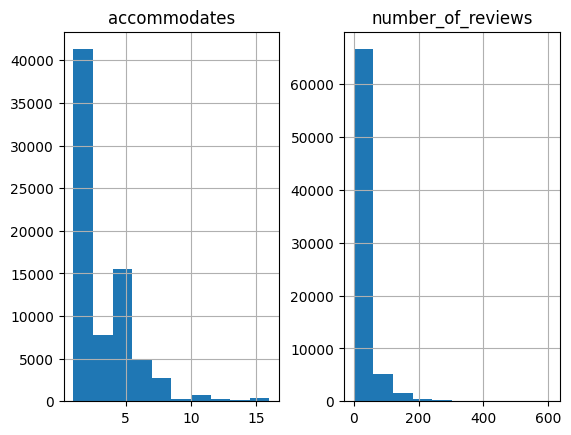

In [16]:
num_features = ['accommodates', 'number_of_reviews']
df[num_features].hist()
plt.show()

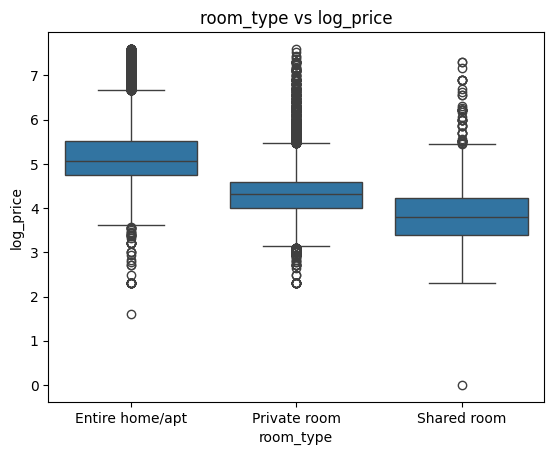

In [17]:
cat_features = ["room_type"]
for feature in cat_features:
    sns.boxplot(x=feature, y='log_price', data=df)
    plt.title(f'{feature} vs log_price')
    plt.show()

**Observation :**

1.log_price od entire home/apt is maximum while shared room is minimum .

**Bar plot of property type**

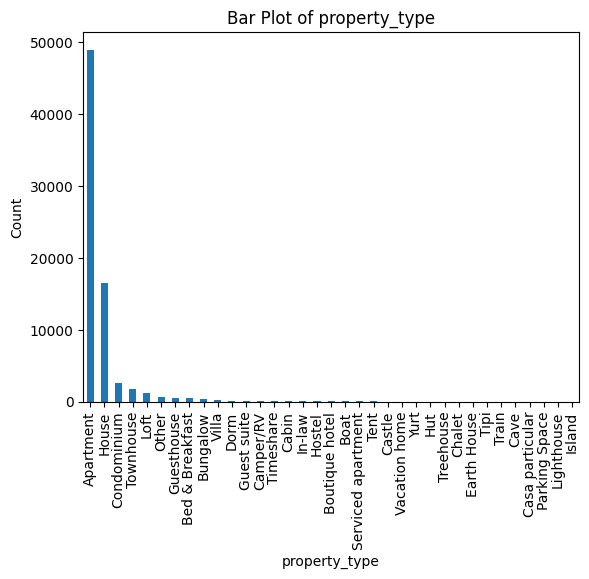

In [18]:
cat_features = [ 'property_type']
for feature in cat_features:
    df[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {feature}')
    plt.show()

**Observations - Maximum number of property types are apartment and house and rest are comparitevely very less in number**

In [19]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

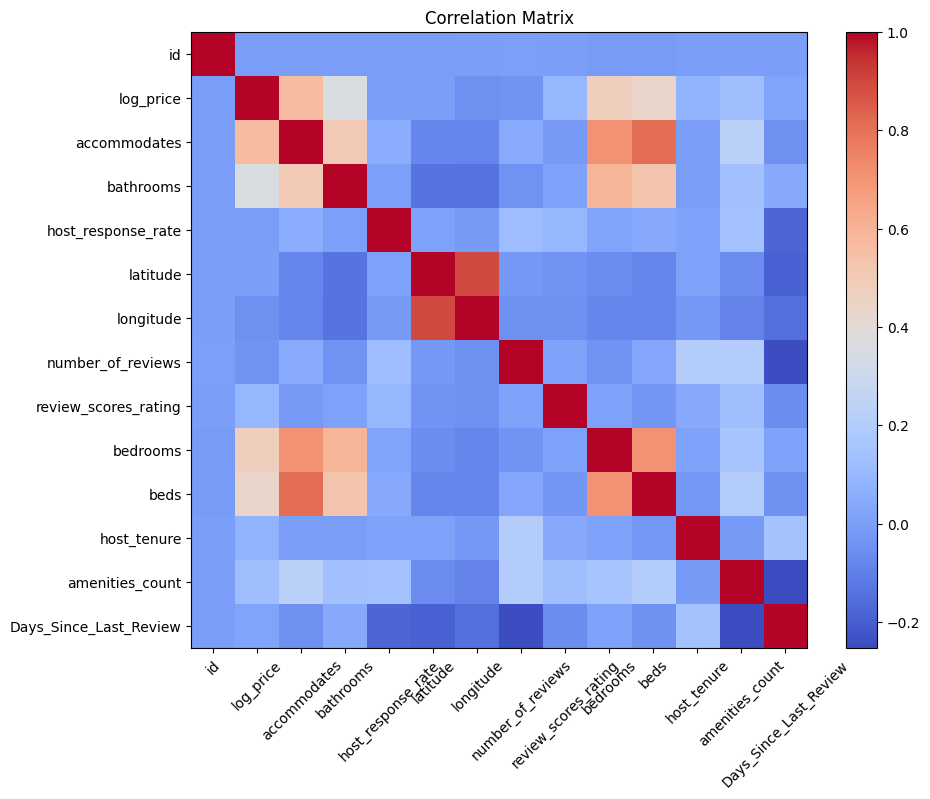

In [20]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(correlation_matrix.index)), labels=correlation_matrix.index)
plt.title('Correlation Matrix')
plt.show()

**OBSERVATIONS:**
1.log_price and accomodates are highly correlated.
2.log_price and number of reviews are less correlated


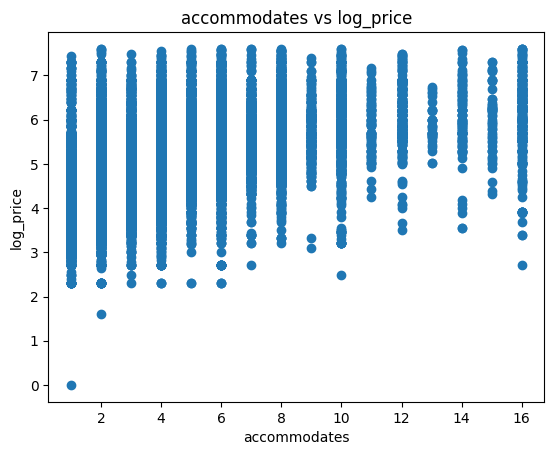

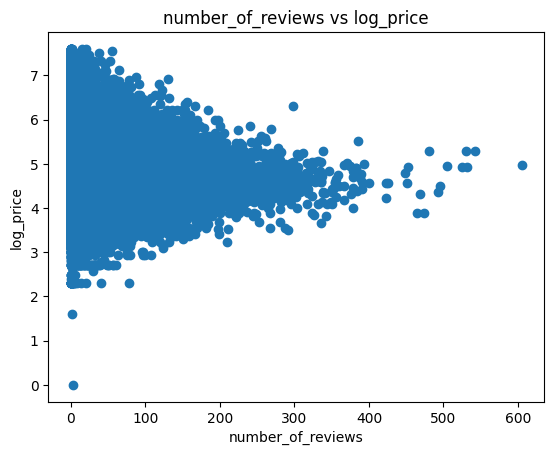

In [21]:
for feature in num_features:
    plt.scatter(df[feature], df['log_price'])
    plt.xlabel(feature)
    plt.ylabel('log_price')
    plt.title(f'{feature} vs log_price')
    plt.show()

<Figure size 1200x800 with 0 Axes>

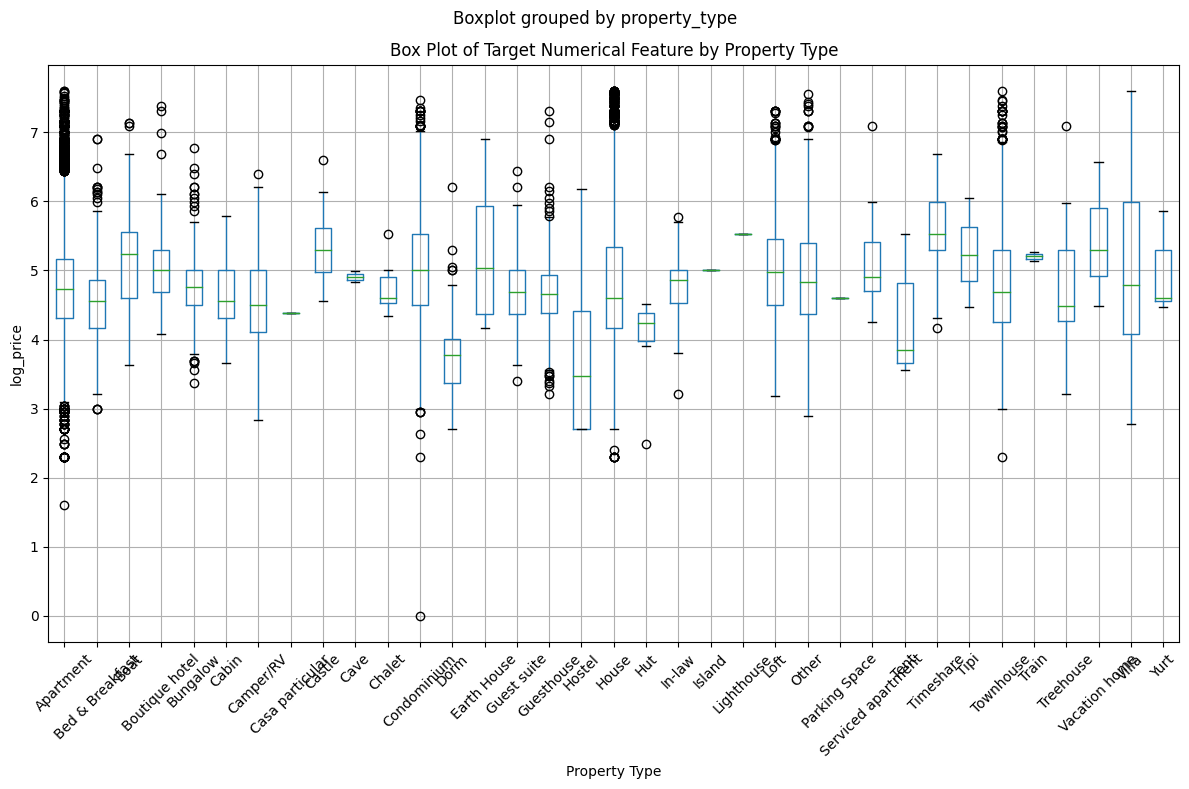

In [22]:
plt.figure(figsize=(12, 8))
df.boxplot(column='log_price', by='property_type', figsize=(12, 8))
plt.title('Box Plot of Target Numerical Feature by Property Type')
plt.xlabel('Property Type')
plt.ylabel('log_price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


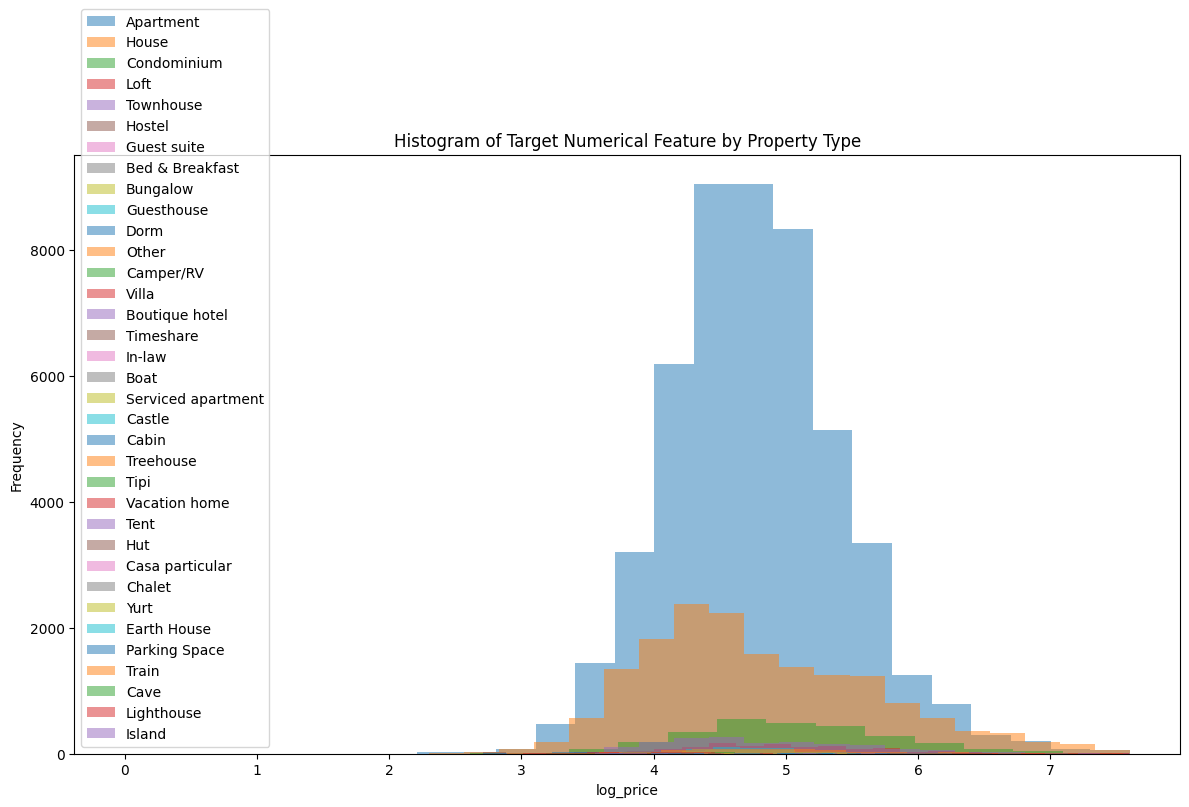

In [23]:
plt.figure(figsize=(12, 8))
for prop_type in df['property_type'].unique():
    plt.hist(df[df['property_type'] == prop_type]['log_price'], bins=20, alpha=0.5, label=prop_type)
plt.title('Histogram of Target Numerical Feature by Property Type')
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


**OBSERVATIONS:**
log price of apartment and house are in a large range

**TASK3 - GEOSPATIAL ANALYSIS**

In [24]:
columns_needed =["latitude","longitude","city","neighbourhood","log_price"]
df1 = df[columns_needed]
df1.head()

,latitude,longitude,city,neighbourhood,log_price
0,40.696524,-73.991617,NYC,Brooklyn Heights,5.010635
1,40.766115,-73.989040,NYC,Hell's Kitchen,5.129899
2,40.808110,-73.943756,NYC,Harlem,4.976734
3,37.772004,-122.431619,SF,Lower Haight,6.620073
4,38.925627,-77.034596,DC,Columbia Heights,4.744932


Using a cmap for relation between latitude,longitude and log price

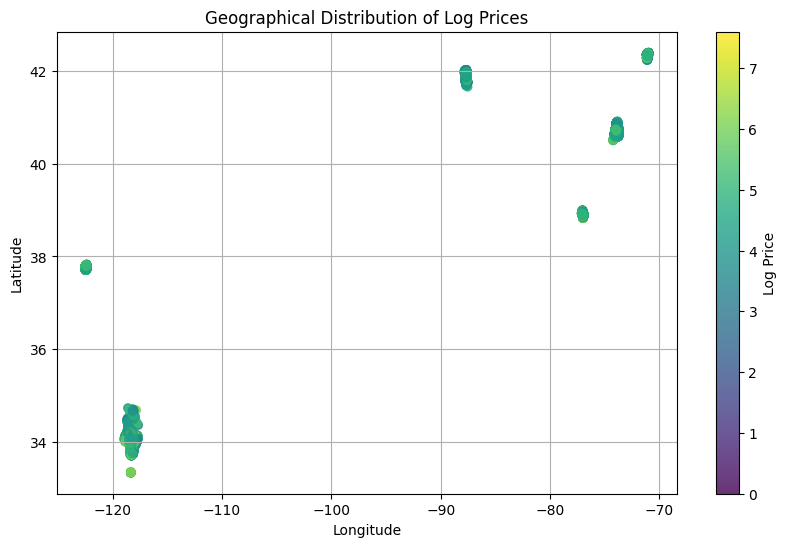

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['longitude'], df1['latitude'], c=df1['log_price'], cmap='viridis', alpha=0.8)
plt.colorbar(label='Log Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Log Prices')
plt.grid(True)
plt.show()


Bar chart for city vs log_price

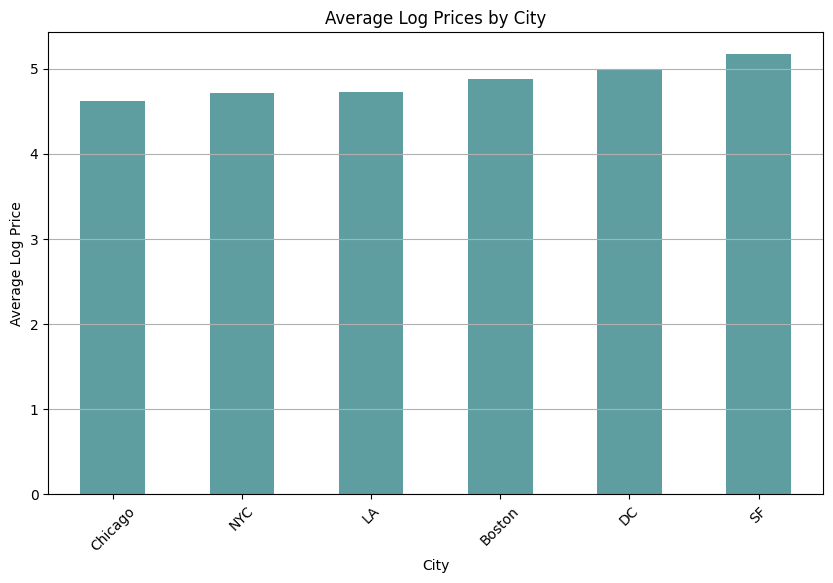

In [26]:
avg_prices_by_city = df1.groupby('city')['log_price'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_prices_by_city.plot(kind='bar', color='cadetblue')
plt.xlabel('City')
plt.ylabel('Average Log Price')
plt.title('Average Log Prices by City')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Observation:  San Francicso city has maximum average log_price


**TASK4 - Sentiment Analysis on Textual Data:**

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):
    if isinstance(text, str):

        words = word_tokenize(text.lower())


        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word.isalnum() and word not in stop_words]


        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        return ''

df['clean_description'] = df['description'].apply(preprocess_text)


def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity


df['sentiment_polarity'], df['sentiment_subjectivity'] = zip(*df['clean_description'].apply(get_sentiment))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Sentiment polarity analysis**

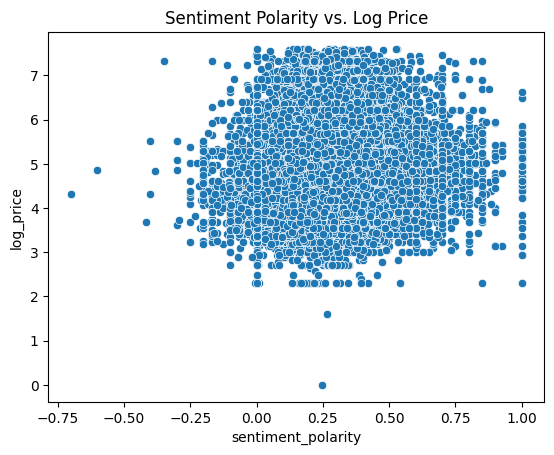

In [28]:
sns.scatterplot(x='sentiment_polarity', y='log_price', data=df)
plt.title('Sentiment Polarity vs. Log Price')
plt.show()


In [29]:
correlation = df['sentiment_polarity'].corr(df['log_price'])
print(f"Correlation between sentiment polarity and log_price: {correlation}")


Correlation between sentiment polarity and log_price: 0.07657605269655848


In [30]:
mean_price_positive = df[df['sentiment_polarity'] > 0.5]['log_price'].mean()
mean_price_negative = df[df['sentiment_polarity'] < 0.5]['log_price'].mean()

print(f"Mean price for positive sentiment listings: {mean_price_positive}")
print(f"Mean price for negative sentiment listings: {mean_price_negative}")


Mean price for positive sentiment listings: 4.813575893313005
Mean price for negative sentiment listings: 4.780485126128418


Observation:
1.Sentiment polarity plot shows that maximum descriptions are positive (satisfaction,happiness or approval).

2.when we move towards higher values of sentiment polarity data points which have log_price less than 4  are very low

3.when the sentiment polarity is too negative (not satisfied) there are very few data points.

4.We can see that we are getting a positive correlation but the value of correlation coefficient is very less ,which can be also seen in the plot because data is dispered in a large area and not following a trend

5.By seeing the mean price for both positive and negative sentiment ,we can conclude the sentiment polarity of listing is not impacting much in log_price of listing

**Sentiment subjectivity analysis**

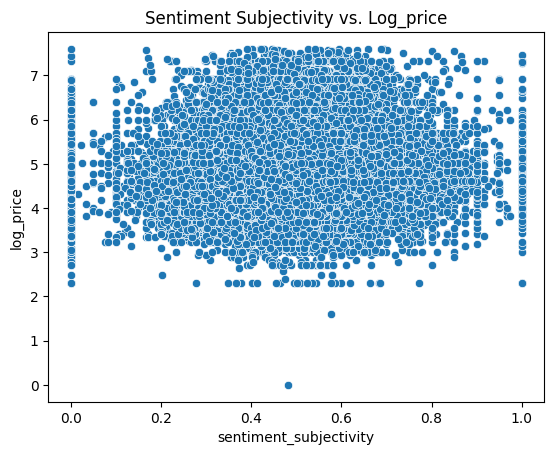

In [31]:
sns.scatterplot(x='sentiment_subjectivity', y='log_price', data=df)
plt.title('Sentiment Subjectivity vs. Log_price')
plt.show()


In [32]:
correlation = df['sentiment_subjectivity'].corr(df['log_price'])
print(f"Correlation between sentiment subjectivity and log_price: {correlation}")


Correlation between sentiment subjectivity and log_price: 0.027672905286702458


In [33]:
mean_price_subjective = df[df['sentiment_subjectivity'] > 0.5]['log_price'].mean()
mean_price_facts = df[df['sentiment_subjectivity'] < 0.5]['log_price'].mean()

print(f"Mean price for more subjective listings: {mean_price_subjective}")
print(f"Mean price for factual listings: {mean_price_facts}")


Mean price for more subjective listings: 4.781218458602886
Mean price for factual listings: 4.783008726530317


**Observation:**
1. sentiment subjectivity is have a very minute affect in log_price

In [34]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,thumbnail_url,zipcode,bedrooms,beds,host_tenure,amenities_count,Days_Since_Last_Review,clean_description,sentiment_polarity,sentiment_subjectivity
0,6901257,5.010635,Apartment,Entire home/apt,"{Wireless Internet,Air conditioning,Kitchen,He...",3,1.0,Real Bed,strict,True,...,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,12.0,17,2850.0,beautiful sunlit brownstone loveliest neighbor...,0.716667,0.916667
1,6304928,5.129899,Apartment,Entire home/apt,"{Wireless Internet,Air conditioning,Kitchen,He...",7,1.0,Real Bed,strict,True,...,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,6.0,25,2418.0,enjoy travelling stay manhattan place centrall...,0.250000,0.461275
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,Cable TV,Wireless Internet,Air conditionin...",5,1.0,Real Bed,moderate,True,...,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,7.0,36,2427.0,oasis come complete full backyard outdoor furn...,0.291278,0.528083
3,13418779,6.620073,House,Entire home/apt,"{TV,Cable TV,Internet,Wireless Internet,Kitche...",4,1.0,Real Bed,flexible,True,...,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,9.0,26,NaN,super clean come modern amenity traveler could...,0.251515,0.542424
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,Wireless Internet,Air conditionin...",2,1.0,Real Bed,moderate,True,...,NaN,20009,0.0,1.0,9.0,20,2662.0,cool cozy comfortable studio located heart cit...,0.265000,0.555000


**Task6 - Categorical Data encoding**

1.we can drop the description column as we have already extracted sentiment polarity and subjectivity values from it.

2.I have removed last_review and host since columns because we have already got significant information by creating new columns of host tenure and days since last review.

3.Assumption - I have assumed that Id ,First review and thumbnail_url do not play significant role in predicting the log_price

In [35]:
new_df = df.drop(["description","clean_description","last_review","host_since","id","first_review","thumbnail_url"],axis =1)
new_df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_tenure,amenities_count,Days_Since_Last_Review,sentiment_polarity,sentiment_subjectivity
0,5.010635,Apartment,Entire home/apt,"{Wireless Internet,Air conditioning,Kitchen,He...",3,1.0,Real Bed,strict,True,NYC,...,2,100.0,11201,1.0,1.0,12.0,17,2850.0,0.716667,0.916667
1,5.129899,Apartment,Entire home/apt,"{Wireless Internet,Air conditioning,Kitchen,He...",7,1.0,Real Bed,strict,True,NYC,...,6,93.0,10019,3.0,3.0,6.0,25,2418.0,0.250000,0.461275
2,4.976734,Apartment,Entire home/apt,"{TV,Cable TV,Wireless Internet,Air conditionin...",5,1.0,Real Bed,moderate,True,NYC,...,10,92.0,10027,1.0,3.0,7.0,36,2427.0,0.291278,0.528083
3,6.620073,House,Entire home/apt,"{TV,Cable TV,Internet,Wireless Internet,Kitche...",4,1.0,Real Bed,flexible,True,SF,...,0,NaN,94117,2.0,2.0,9.0,26,NaN,0.251515,0.542424
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,Wireless Internet,Air conditionin...",2,1.0,Real Bed,moderate,True,DC,...,4,40.0,20009,0.0,1.0,9.0,20,2662.0,0.265000,0.555000


In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_has_profile_pic    73923 non-null  object 
 11  host_identity_verified  73923 non-null  object 
 12  host_response_rate      55812 non-null  float64
 13  instant_bookable        74111 non-null  object 
 14  latitude                74111 non-null

In [37]:
new_df["cleaning_fee"] = new_df["cleaning_fee"].replace({
    True : 1,
    False : 0
})

In [38]:
object_columns = new_df.select_dtypes(include=['object']).columns.tolist()

In [39]:
new_df.isnull().any()

log_price                 False
property_type             False
room_type                 False
amenities                 False
accommodates              False
bathrooms                  True
bed_type                  False
cancellation_policy       False
cleaning_fee              False
city                      False
host_has_profile_pic       True
host_identity_verified     True
host_response_rate         True
instant_bookable          False
latitude                  False
longitude                 False
name                       True
neighbourhood              True
number_of_reviews         False
review_scores_rating       True
zipcode                    True
bedrooms                   True
beds                       True
host_tenure                True
amenities_count           False
Days_Since_Last_Review     True
sentiment_polarity        False
sentiment_subjectivity    False
dtype: bool

Dropping missing values

In [40]:
new_df = new_df.dropna()

In [41]:
new_df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_tenure,amenities_count,Days_Since_Last_Review,sentiment_polarity,sentiment_subjectivity
1,5.129899,Apartment,Entire home/apt,"{Wireless Internet,Air conditioning,Kitchen,He...",7,1.0,Real Bed,strict,1,NYC,...,6,93.0,10019,3.0,3.0,6.0,25,2418.0,0.250000,0.461275
2,4.976734,Apartment,Entire home/apt,"{TV,Cable TV,Wireless Internet,Air conditionin...",5,1.0,Real Bed,moderate,1,NYC,...,10,92.0,10027,1.0,3.0,7.0,36,2427.0,0.291278,0.528083
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,Wireless Internet,Air conditionin...",2,1.0,Real Bed,moderate,1,DC,...,4,40.0,20009,0.0,1.0,9.0,20,2662.0,0.265000,0.555000
5,4.442651,Apartment,Private room,"{TV,Wireless Internet,Heating,Smoke detector,C...",2,1.0,Real Bed,strict,1,SF,...,3,100.0,94131,1.0,1.0,6.0,19,2436.0,0.271619,0.550524
7,4.787492,Condominium,Entire home/apt,"{TV,Cable TV,Wireless Internet,Wheelchair acce...",2,1.0,Real Bed,moderate,1,LA,...,9,93.0,90015,1.0,1.0,10.0,52,2582.0,0.141439,0.390000


In [42]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42767 entries, 1 to 74110
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               42767 non-null  float64
 1   property_type           42767 non-null  object 
 2   room_type               42767 non-null  object 
 3   amenities               42767 non-null  object 
 4   accommodates            42767 non-null  int64  
 5   bathrooms               42767 non-null  float64
 6   bed_type                42767 non-null  object 
 7   cancellation_policy     42767 non-null  object 
 8   cleaning_fee            42767 non-null  int64  
 9   city                    42767 non-null  object 
 10  host_has_profile_pic    42767 non-null  object 
 11  host_identity_verified  42767 non-null  object 
 12  host_response_rate      42767 non-null  float64
 13  instant_bookable        42767 non-null  object 
 14  latitude                42767 non-null  flo

**I tried using one hot encoding but it my ram was crashing during this thats why i used label encoding**

In [43]:
from sklearn.preprocessing import LabelEncoder
new_df[object_columns] = new_df[object_columns].fillna('missing').astype(str)
object_columns = new_df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in object_columns:
    new_df[col] = label_encoder.fit_transform(new_df[col])


In [44]:
new_df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,host_tenure,amenities_count,Days_Since_Last_Review,sentiment_polarity,sentiment_subjectivity
1,5.129899,0,0,36973,7,1.0,4,2,1,4,...,6,93.0,18,3.0,3.0,6.0,25,2418.0,0.250000,0.461275
2,4.976734,0,0,17860,5,1.0,4,1,1,4,...,10,92.0,25,1.0,3.0,7.0,36,2427.0,0.291278,0.528083
4,4.744932,0,0,21373,2,1.0,4,1,1,2,...,4,40.0,198,0.0,1.0,9.0,20,2662.0,0.265000,0.555000
5,4.442651,0,1,33522,2,1.0,4,2,1,5,...,3,100.0,571,1.0,1.0,6.0,19,2436.0,0.271619,0.550524
7,4.787492,10,0,20132,2,1.0,4,1,1,3,...,9,93.0,323,1.0,1.0,10.0,52,2582.0,0.141439,0.390000


**Task 7-8 Model development and training and Model evaluation**

**Simple Linear regression**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

X = new_df.drop("log_price",axis =1)
y = new_df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 0.17237425257192707
Root Mean Squared Error (RMSE): 0.4151797834335471
R-squared (R2) Score: 0.6049758376134982


**Lasso regression**

In [47]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

lasso_model = Lasso()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}


grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_lasso_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
best_lasso_model.fit(X_train, y_train)

y_pred_train_lasso = best_lasso_model.predict(X_train)
y_pred_test_lasso = best_lasso_model.predict(X_test)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
rmse_test_lasso = sqrt(mse_test_lasso)
r2_lasso = r2_score(y_test, y_pred_test_lasso)

print("Best Alpha:", best_alpha)
print("MSE (Train) - Lasso:", mse_train_lasso)
print("MSE (Test) - Lasso:", mse_test_lasso)
print("RMSE (Test) - Lasso:", rmse_test_lasso)
print("R-squared (Test) - Lasso:", r2_lasso)


Best Alpha: 0.01
MSE (Train) - Lasso: 0.1772521321892506
MSE (Test) - Lasso: 0.17541702557916053
RMSE (Test) - Lasso: 0.41882815757678055
R-squared (Test) - Lasso: 0.5980028190763294


**Ridge Regression**

In [48]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_ridge_model = grid_search.best_estimator_

best_alpha = grid_search.best_params_['alpha']

best_ridge_model.fit(X_train, y_train)

y_pred_train_ridge = best_ridge_model.predict(X_train)
y_pred_test_ridge = best_ridge_model.predict(X_test)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = sqrt(mse_test_ridge)
r2_ridge = r2_score(y_test, y_pred_test_ridge)

print("Best Alpha (Ridge):", best_alpha)
print("MSE (Train) - Ridge:", mse_train_ridge)
print("MSE (Test) - Ridge:", mse_test_ridge)
print("RMSE (Test) - Ridge:", rmse_test_ridge)
print("R-squared (Test) - Ridge:", r2_ridge)

Best Alpha (Ridge): 10.0
MSE (Train) - Ridge: 0.1745705607347212
MSE (Test) - Ridge: 0.17240832623378302
RMSE (Test) - Ridge: 0.41522081623370355
R-squared (Test) - Ridge: 0.604897752171309


**Random Forest Regression**

In [49]:
from sklearn.ensemble import RandomForestRegressor


random_forest_model = RandomForestRegressor(random_state=20)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression:")
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)

Random Forest Regression:
RMSE: 0.32746701487876895
R-squared: 0.7542540401643805


**GradientBoostingRegression**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting_model = GradientBoostingRegressor(random_state=20)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print("RMSE:", rmse_gb)
print("R-squared:", r2_gb)

Gradient Boosting Regression:
RMSE: 0.3432625995016478
R-squared: 0.7299748357654923


**TASK9 -  Feature Importance and Model Insights:**

**(a) Feature importance Scores**

**Random Forest**

In [51]:
feature_importances_rf = random_forest_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Impacting log_price (Random Forest):")
feature_importance_df.head(10)


Top Features Impacting log_price (Random Forest):


,Feature,Importance
1,room_type,0.419103
4,bathrooms,0.129501
14,longitude,0.073421
19,zipcode,0.064908
13,latitude,0.043412
20,bedrooms,0.032374
3,accommodates,0.025906
2,amenities,0.025123
24,Days_Since_Last_Review,0.022784
15,name,0.019371


**Gradient Boosting**

In [55]:
feature_importances_gb = gradient_boosting_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gb})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Impacting log_price (gradient boosting):")
feature_importance_df.head(10)


Top Features Impacting log_price (gradient boosting):


,Feature,Importance
1,room_type,0.519260
4,bathrooms,0.117400
20,bedrooms,0.079137
3,accommodates,0.072120
19,zipcode,0.072070
14,longitude,0.066588
13,latitude,0.028604
18,review_scores_rating,0.011490
2,amenities,0.009973
24,Days_Since_Last_Review,0.005388


In [52]:
pip install shap

**(b) SHAP Value**

 93%|=================== | 7927/8554 [00:15<00:01]       

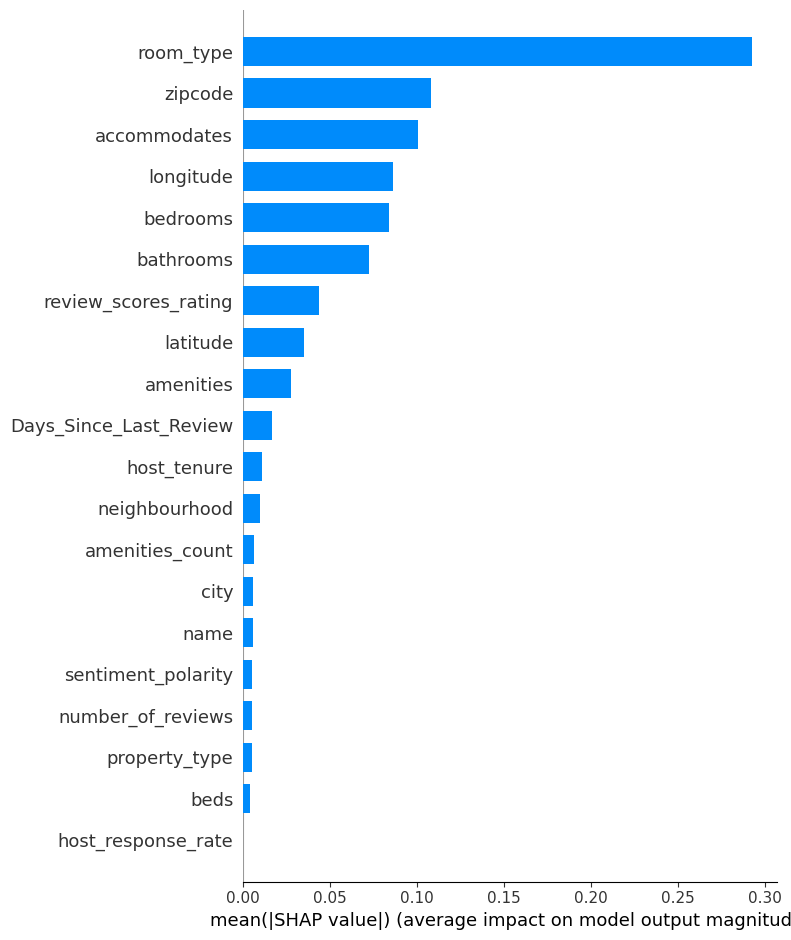

In [53]:
import shap

explainer = shap.Explainer(gradient_boosting_model, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


**Random Forest is giving us the best r2 score**

**Task10-Predictive performance assesment**

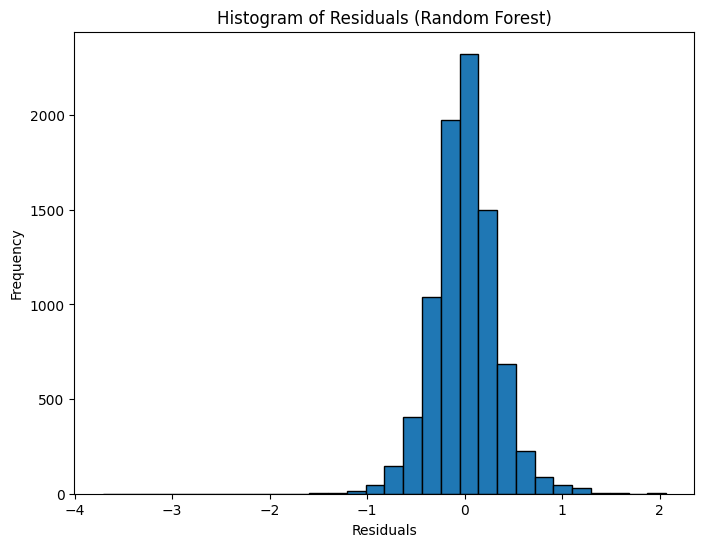

In [56]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8, 6))
plt.hist(residuals_rf, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Random Forest)')
plt.show()

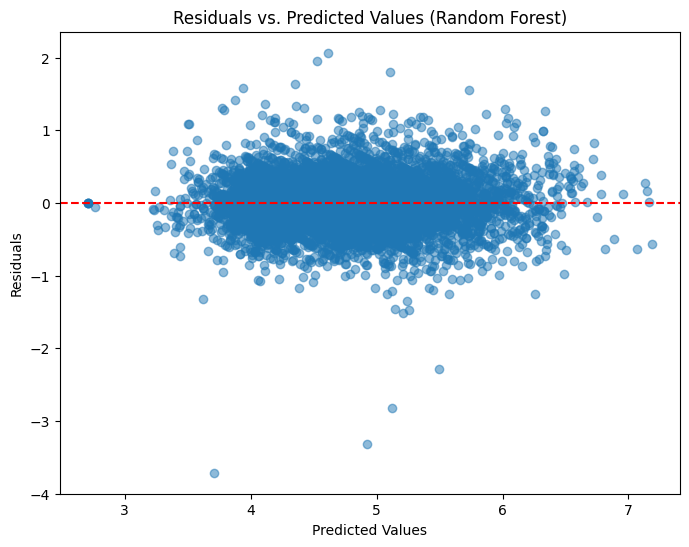

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.show()


**It can be seen from the plot that residuals are uniformly dispersed around origin which is a good thing because it means that they are not following any trend with predicted values**